In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

 92% 169M/185M [00:03<00:00, 77.8MB/s]
100% 185M/185M [00:03<00:00, 50.2MB/s]


In [3]:
!unzip -o az-handwritten-alphabets-in-csv-format.zip


Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping



Read dataset

In [5]:
df = pd.read_csv('/content/A_Z Handwritten Data/A_Z Handwritten Data.csv').astype('float32')
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(372450, 785)

In [ ]:
df.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


Split x and y column from dataset

In [6]:
x = df.drop('0', axis = 1)
y = df['0']

Reshaping images from dataset

In [7]:
# we are reshaping the train & test image data so that they can be displayed as an image,
# as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)
print('Train Data Shape:', y_train.shape)
print('Test Data Shape:', y_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)
Train Data Shape: (297960,)
Test Data Shape: (74490,)


Creating dictionary of alphabets

In [8]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

show random images

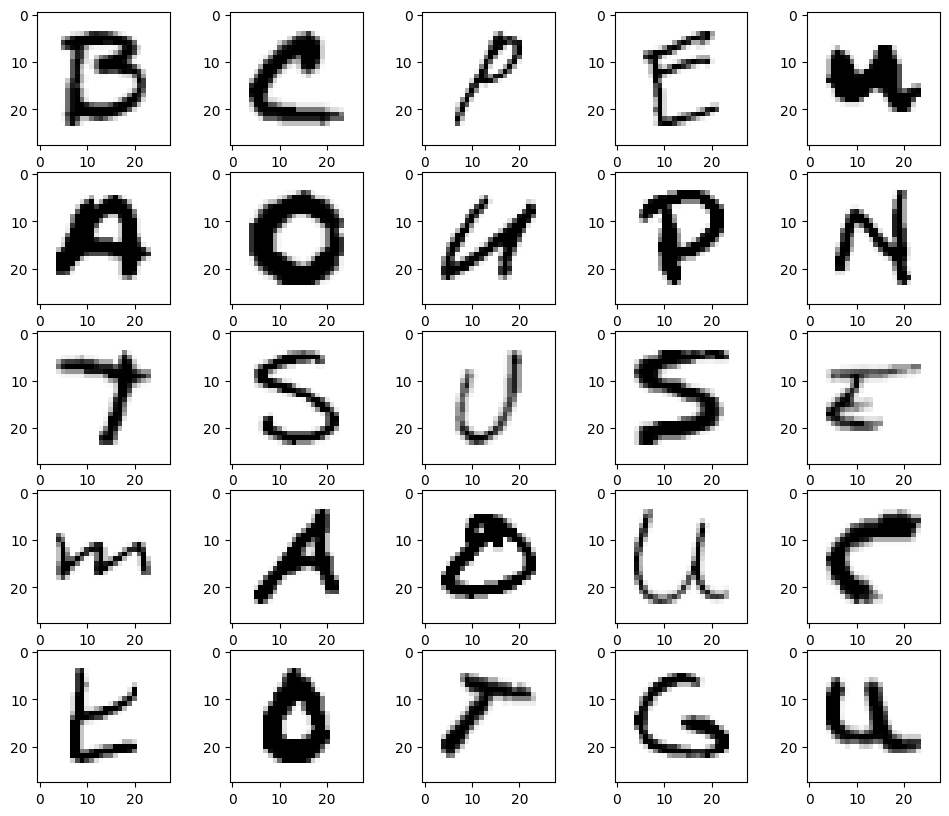

In [9]:
plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):
    plt.subplot(colums, row, i+1)
    plt.imshow(x_train[i].reshape([28,28]),interpolation='nearest', cmap='Greys')
plt.show()

Normalize images

In [10]:
train_images = x_train / 255.0
test_images = x_test / 255.0


Reshape data

In [ ]:
# train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
# print("New shape of train data:", train_images.shape)

# test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
# print("New shape of test data:", test_images.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [11]:
train_images=train_images.reshape(297960,784)
test_images=test_images.reshape(74490,784)

convert number to 26 categories

In [12]:
import tensorflow as tf
number_of_classes = 26
ytrain = tf.keras.utils.to_categorical(y_train, number_of_classes)
ytest = tf.keras.utils.to_categorical(y_test, number_of_classes)

In [13]:
# Display the shape of the training and testing data
print("X_train shape : ", train_images.shape)
print("X_test shape : ", test_images.shape)
print("y_train shape : ", ytrain.shape)
print("y_test shape : ", ytest.shape)

X_train shape :  (297960, 784)
X_test shape :  (74490, 784)
y_train shape :  (297960, 26)
y_test shape :  (74490, 26)


Split 10% validation


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, ytrain, test_size=0.1, random_state=42)

#ANN

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
model1 = Sequential()


model1.add(Dense(784, input_shape=(784,), kernel_initializer='normal', activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(26, kernel_initializer='normal', activation='softmax'))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
save1 = ModelCheckpoint('my_model1.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [ ]:
model1.compile(optimizer=SGD(0.001),loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images,
                    ytrain,
                    epochs=100,
                    batch_size=50,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping, save1])

Epoch 1/100
5364/5364 [==============================] - ETA: 0s - loss: 2.4706 - accuracy: 0.3139
Epoch 1: val_loss improved from inf to 1.80095, saving model to my_model1.h5
5364/5364 [==============================] - 27s 5ms/step - loss: 2.4706 - accuracy: 0.3139 - val_loss: 1.8009 - val_accuracy: 0.5299
Epoch 2/100
  30/5364 [..............................] - ETA: 18s - loss: 1.8529 - accuracy: 0.4993

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5354/5364 [============================>.] - ETA: 0s - loss: 1.3158 - accuracy: 0.6367
Epoch 2: val_loss improved from 1.80095 to 0.96954, saving model to my_model1.h5
5364/5364 [==============================] - 24s 5ms/step - loss: 1.3152 - accuracy: 0.6369 - val_loss: 0.9695 - val_accuracy: 0.7319
Epoch 3/100
5359/5364 [============================>.] - ETA: 0s - loss: 0.8239 - accuracy: 0.7709
Epoch 3: val_loss improved from 0.96954 to 0.71310, saving model to my_model1.h5
5364/5364 [==============================] - 24s 5ms/step - loss: 0.8239 - accuracy: 0.7709 - val_loss: 0.7131 - val_accuracy: 0.8036
Epoch 4/100
5361/5364 [============================>.] - ETA: 0s - loss: 0.6540 - accuracy: 0.8213
Epoch 4: val_loss improved from 0.71310 to 0.59927, saving model to my_model1.h5
5364/5364 [==============================] - 25s 5ms/step - loss: 0.6540 - accuracy: 0.8213 - val_loss: 0.5993 - val_accuracy: 0.8345
Epoch 5/100
5354/5364 [============================>.] - ETA: 0s - los

In [ ]:
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 784)               615440    
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 26)                3354      
                                                                 
Total params: 752298 (2.87 MB)
Trainable params: 752298 (2.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
print("The validation accuracy is :", history1.history['val_accuracy'][-1])
print("The training accuracy is :", history1.history['accuracy'][-1])
print("The validation loss is :", history1.history['val_loss'][-1])
print("The training loss is :", history1.history['loss'][-1])

The validation accuracy is : 0.9805678725242615
The training accuracy is : 0.9910129904747009
The validation loss is : 0.07384182512760162
The training loss is : 0.03973217308521271


In [ ]:
test_loss, test_accuracy = model1.evaluate(test_images, ytest)
print(f'Test Accuracy: {test_accuracy}')

2328/2328 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9795
Test Accuracy: 0.9795005917549133


In [ ]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1,len(acc)+1)

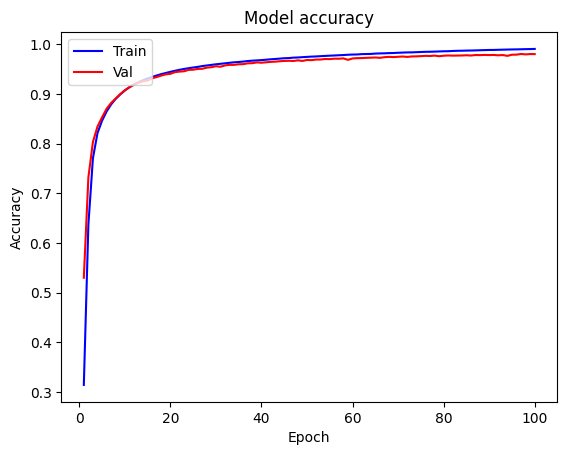

In [ ]:
plotgraph(epochs, acc, val_acc)

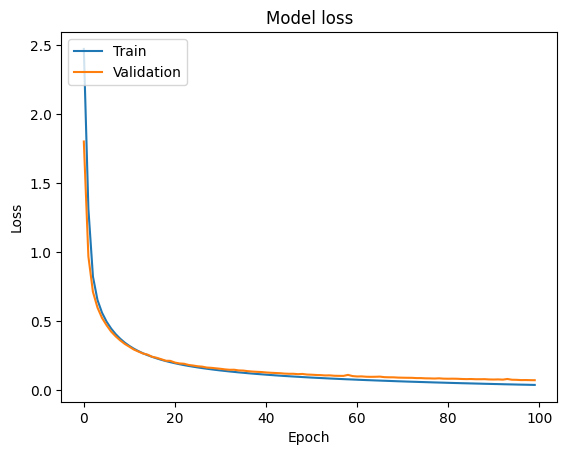

In [ ]:
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Prediction

In [15]:
from keras.models import load_model
model_path = '/content/my_model1.h5'
loaded_model = load_model(model_path)

In [17]:
loaded_model.load_weights("/content/my_model1.h5")

1/1 [==============================] - 0s 152ms/step
The letter is - Y
1/1 [==============================] - 0s 23ms/step
The letter is - U
1/1 [==============================] - 0s 18ms/step
The letter is - E
1/1 [==============================] - 0s 20ms/step
The letter is - U


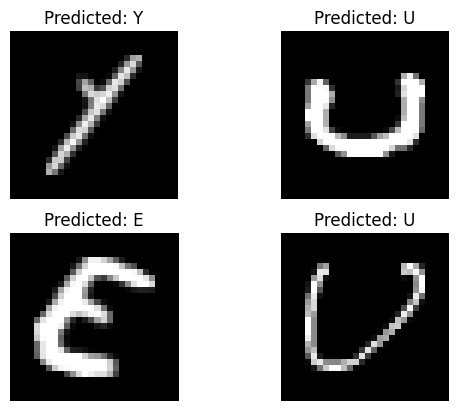

In [18]:
test_images = X_val[2384:2388]
test_images = test_images.reshape(test_images.shape[0], 28, 28)

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1, 784)
    prediction = np.argmax(loaded_model.predict(test_image), axis=1)

    letter = word_dict[prediction[0]]
    print("The letter is - {}".format(letter))

    plt.subplot(2, 2, i)
    plt.imshow(org_image, cmap=plt.cm.gray)
    plt.title("Predicted: {}".format(letter))
    plt.axis('off')

plt.show()

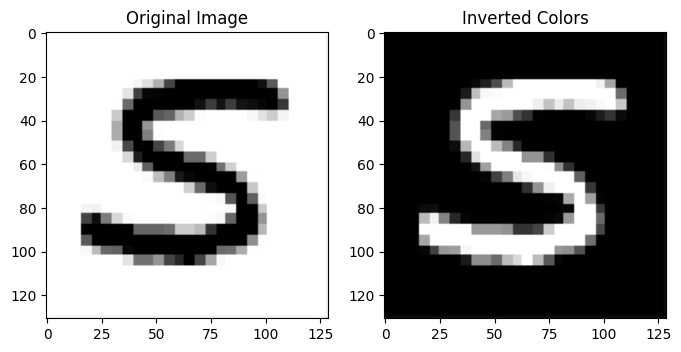

In [ ]:
import cv2
import matplotlib.pyplot as plt

def invert_colors(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert the colors
    inverted_img = cv2.bitwise_not(gray_img)

    return inverted_img

# Path to your image
image_path = "/content/SS.png"

# Invert colors
inverted_image = invert_colors(image_path)

# Display the original and inverted images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap='gray')
plt.title("Inverted Colors")

plt.show()


1/1 [==============================] - 0s 56ms/step


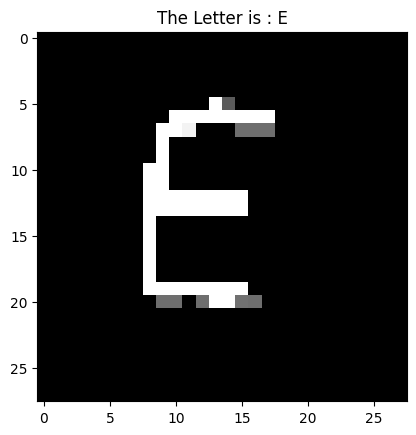

In [34]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def should_invert_colors(image):
    # Check if the image has a non-black background and white letters
    avg_color = np.mean(image)
    return avg_color > 100  # You can adjust this threshold as needed

def invert_colors(image):
    return cv2.bitwise_not(image)

def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Check if colors should be inverted
    if should_invert_colors(gray_img):
        gray_img = invert_colors(gray_img)

    # Resize the image to match your model's input size
    resized_img = cv2.resize(gray_img, (28, 28))

    # Flatten to 1D and normalize pixel values
    flattened_img = resized_img.reshape(1, 784).astype('float32') / 255.0

    return flattened_img

image_path = "/content/e.png"

input_image = preprocess_image(image_path)


predicted_class = np.argmax(loaded_model.predict(input_image), axis=1)
predicted_letter = word_dict[predicted_class[0]]


plt.imshow(input_image.reshape(28, 28), cmap='gray')
plt.title(f"The Letter is : {predicted_letter}")
plt.show()
